In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
import matplotlib

from hydrophone_data_processing import load

In [2]:
spectra = io.loadmat('BA1B_bubble_spectra.mat')

In [3]:
bubbles = pd.read_csv('allbubblesh1.csv', names=np.arange(2114))


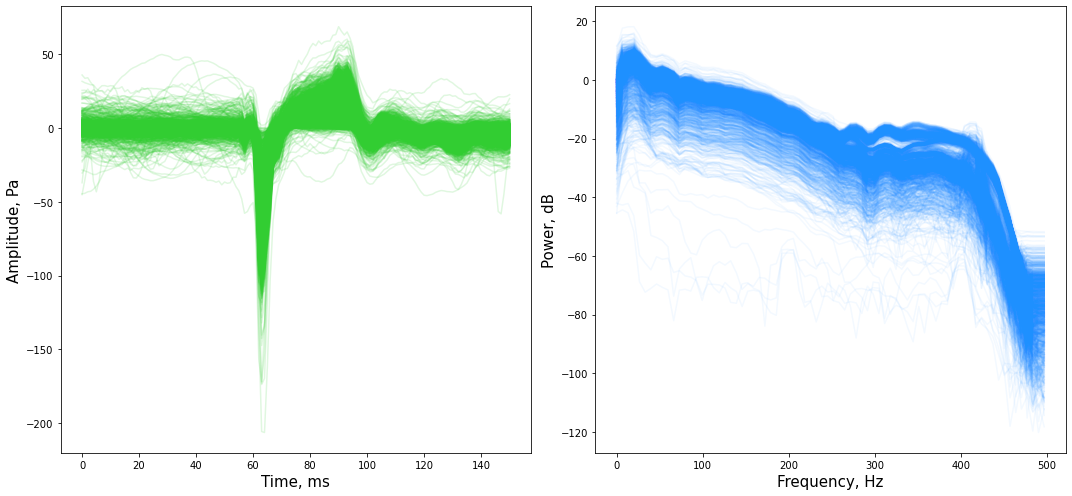

In [4]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax.plot(bubbles.values, color='limegreen', alpha=0.15)
ax.set_ylabel('Amplitude, Pa', fontsize=15)
ax.set_xlabel('Time, ms', fontsize=15)

ax2.plot(spectra['f'], 10*np.log10(spectra['PXX']), color='dodgerblue', alpha=0.05)
ax2.set_ylabel('Power, dB', fontsize=15)
ax2.set_xlabel('Frequency, Hz', fontsize=15)
fig.tight_layout()

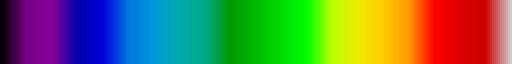

In [5]:
plt.cm.nipy_spectral

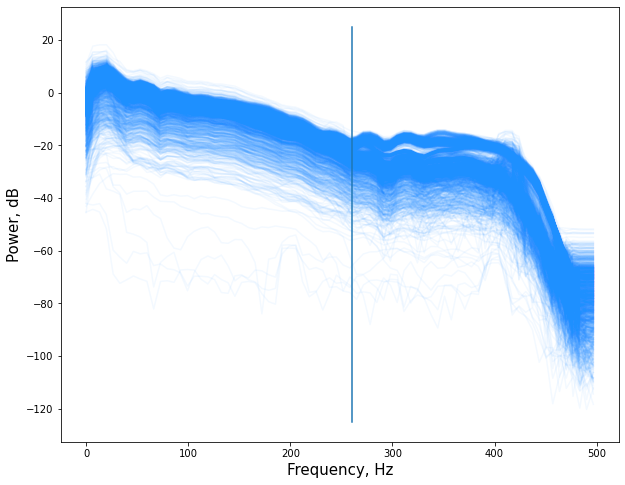

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(spectra['f'], 10*np.log10(spectra['PXX']), color='dodgerblue', alpha=0.05)
ax.set_ylabel('Power, dB', fontsize=15)
ax.set_xlabel('Frequency, Hz', fontsize=15)

ax.plot([260, 260], [-125, 25])

Text(0.5, 0, 'frequency, Hz')

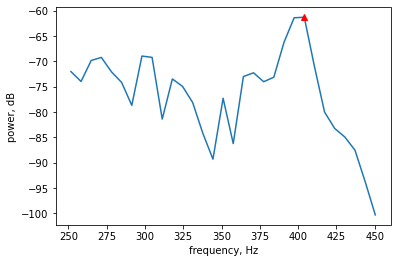

In [7]:
x = spectra['f'].flatten()[38:-7]
y = 10*np.log10(spectra['PXX'][:,1][38:-7])

plt.plot(x, y)

ypeak = np.argmax(y)
xpeak = x[ypeak]

plt.plot(xpeak, y.max(), marker='^', color='red')
plt.ylabel('power, dB')
plt.xlabel('frequency, Hz')

(array([ 670.,  118.,   18.,   46.,   21.,   17.,   22.,  463.,  280.,
          34.,    7.,   45.,  154.,   52.,    5.,    3.,    5.,    4.,
           4.,  146.]),
 array([ 251.65562914,  259.93377483,  268.21192053,  276.49006623,
         284.76821192,  293.04635762,  301.32450331,  309.60264901,
         317.8807947 ,  326.1589404 ,  334.43708609,  342.71523179,
         350.99337748,  359.27152318,  367.54966887,  375.82781457,
         384.10596026,  392.38410596,  400.66225166,  408.94039735,
         417.21854305]),
 <BarContainer object of 20 artists>)

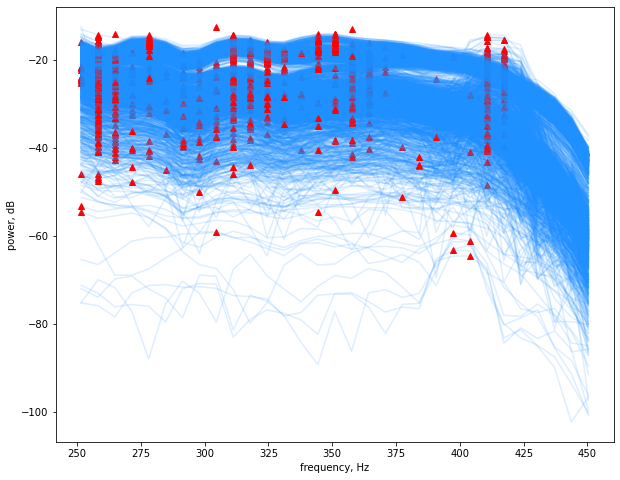

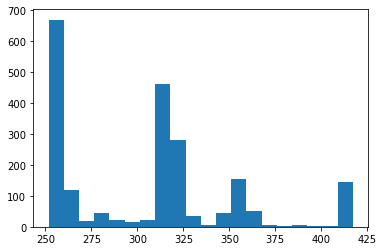

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('power, dB')
ax.set_xlabel('frequency, Hz')
x = spectra['f'].flatten()[38:-7]

peaks = []

for p in spectra['PXX'].transpose():
    y = 10*np.log10(p[38:-7])
    
    ax.plot(x, y, color='dodgerblue', alpha=0.15)
    
    ypeak = np.argmax(y)
    xpeak = x[ypeak]
    
    if ypeak == 0:
        ypeak = np.argmax(y[8:])
        xpeak = x[ypeak]
    
    peaks.append(xpeak)
    
    ax.plot(xpeak, y.max(), marker='^', color='red')
    
fig, ax = plt.subplots()

ax.hist(peaks, bins=20)

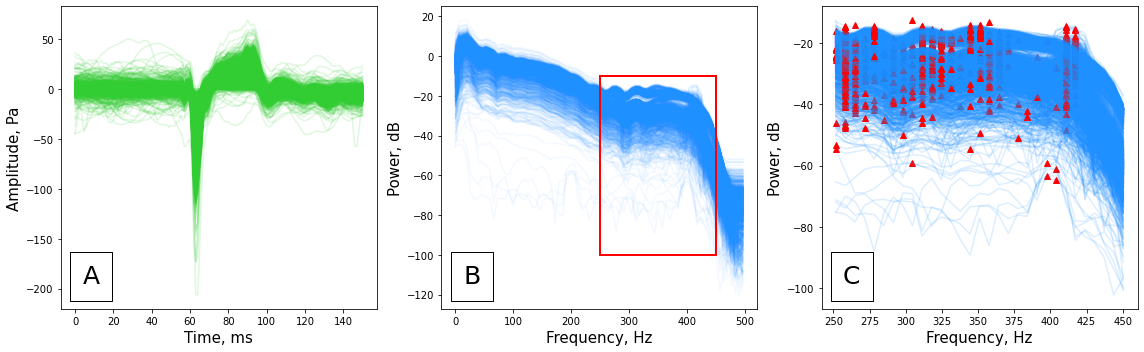

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

bubbles = pd.read_csv('allbubblesh1.csv', names=np.arange(2114))
ax[0].plot(bubbles.values, color='limegreen', alpha=0.15)
ax[0].set_ylabel('Amplitude, Pa', fontsize=15)
ax[0].set_xlabel('Time, ms', fontsize=15)

ax[1].plot(spectra['f'], 10*np.log10(spectra['PXX']), color='dodgerblue', alpha=0.05)
ax[1].set_ylabel('Power, dB', fontsize=15)
ax[1].set_xlabel('Frequency, Hz', fontsize=15)


ax[2].set_ylabel('Power, dB', fontsize=15)
ax[2].set_xlabel('Frequency, Hz', fontsize=15)
x = spectra['f'].flatten()[38:-7]

peaks = []

for p in spectra['PXX'].transpose():
    y = 10*np.log10(p[38:-7])
    
    ax[2].plot(x, y, color='dodgerblue', alpha=0.15)
    
    ypeak = np.argmax(y)
    xpeak = x[ypeak]
    
    if ypeak == 0:
        ypeak = np.argmax(y[8:])
        xpeak = x[ypeak]
    
    peaks.append(xpeak)
    
    ax[2].plot(xpeak, y.max(), marker='^', color='red')
    
bbox = dict(facecolor='none', edgecolor='black', boxstyle='square,pad=0.5')
fig.text(s='A', fontsize=25, x=0.075, y=0.2, bbox=bbox)
fig.text(s='B', fontsize=25, x=0.4051, y=0.2, bbox=bbox)
fig.text(s='C', fontsize=25, x=0.735, y=0.2, bbox=bbox)
# rect = matplotlib.patches.Rectangle((250, -50), 200, 40, linewidth=1, edgecolor='r', facecolor='none', zorder=5000)
rect = matplotlib.patches.Rectangle((250, -100), 200, 90, linewidth=2, edgecolor='r', facecolor='none', zorder=5000)
ax[1].add_patch(rect)

fig.tight_layout()
fig.savefig('figures/supp.pdf', bbox_inches='tight')

9
9
4
0
altered! 20 [-20.37454538 -20.89417845 -21.12068973 -21.27661301 -21.88509776
 -24.03373852 -26.62757494 -29.25749792 -31.65178974 -35.50107224
 -41.50491885]
9
9
9
0
altered! 22 [-21.26428225 -21.31807709 -21.1425117  -21.64866943 -23.63265265
 -26.24178286 -27.39263178 -29.44597597 -33.2067929  -37.16375913
 -44.86783206]
0
altered! 20 [-20.37237891 -20.94352459 -20.76743847 -21.46472064 -21.80823765
 -24.2817508  -25.83664058 -28.95266871 -31.45816559 -35.61893442
 -41.46928244]
14


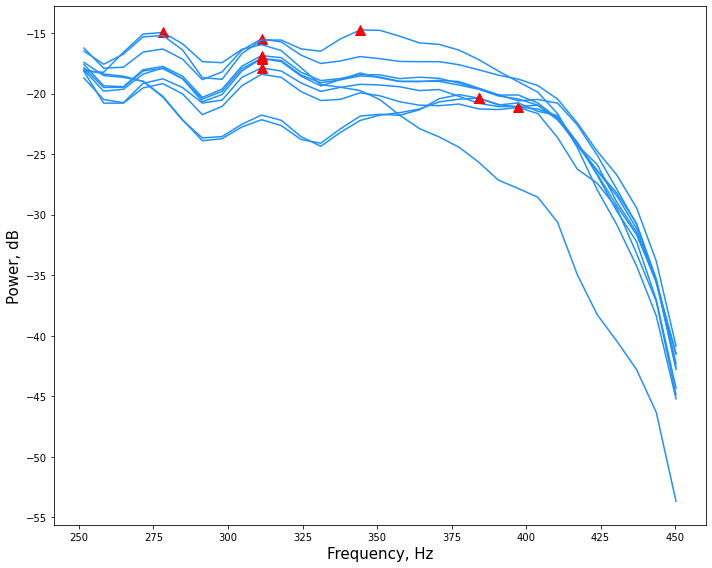

In [103]:

def get_max_xy(x, y):
    ymax = np.argmax(y)
    print(ymax)
    if ymax == 0:
        offset = 20
        ymax = np.argmax(y[offset:]) + offset
        print('altered!', ymax, y[20:])
    xmax = x[ymax]
    ymax = y[ymax]
    return xmax, ymax


fig, ax = plt.subplots(figsize=(10, 8))

ax.set_ylabel('Power, dB', fontsize=15)
ax.set_xlabel('Frequency, Hz', fontsize=15)
x = spectra['f'].flatten()[38:-7]

peaks = []

# indices = np.random.choice(spectra['PXX'].transpose().shape[0], 10, replace=False)

# hand picked indices
indices = [1462, 1668, 2097, 1820, 1677, 1638, 1441, 1360, 1875, 2045]

for n, p in enumerate(spectra['PXX'].transpose()[indices]):
    y = 10*np.log10(p[38:-7])
    
    ax.plot(x, y, color='dodgerblue', alpha=1)

        
    xmax, ymax = get_max_xy(x=x, y=y)

    # ax.plot(x[np.argmax(y)], y.max(), color='red', marker='^', markersize=10)
    ax.plot(xmax, ymax, color='red', marker='^', markersize=10)
    # ax.text(s=str(indices[n]), x=245, y=y.max())    
#     ypeak = np.argmax(y)
#     xpeak = x[ypeak]
    
#     if ypeak == 0:
#         ypeak = np.argmax(y[8:])
#         xpeak = x[ypeak]
    
#     peaks.append(xpeak)
    
    # ax.plot(xpeak, y.max(), marker='^', color='red')

fig.tight_layout()
fig.savefig('figures/supp.pdf', bbox_inches='tight')

AttributeError: 'list' object has no attribute 'max'

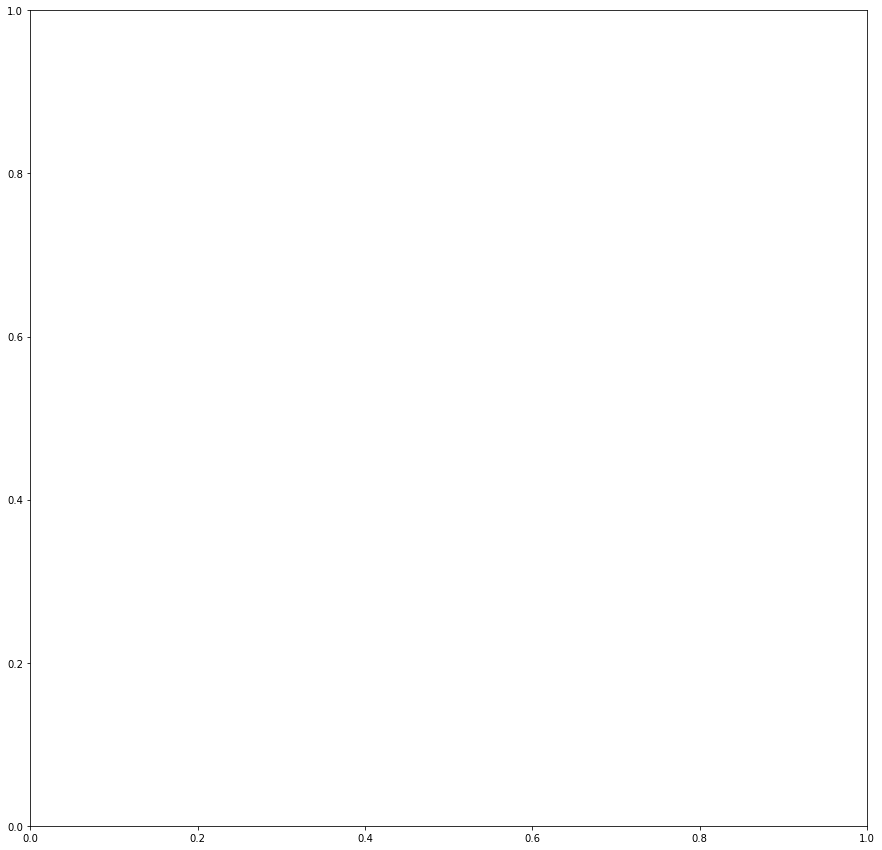

In [102]:
fig, ax = plt.subplots(figsize=(15, 15))

colors = [plt.cm.Spectral(i/indices.max()) for i in indices]

for n, p in enumerate(spectra['PXX'].transpose()[indices]):
    y = 10*np.log10(p[38:-7])
    
    # ax.plot(x, y, color='dodgerblue', alpha=1)
    ax.plot(x, y, color=colors[n], alpha=1, linewidth=5)
    ax.text(s=str(indices[n]), x=245, y=y.max())

In [76]:
indices

array([ 608,  159, 1586, 1675, 1360, 1058, 2097, 1297,  829,  702])

In [67]:
[1462,  353, 1668, 2097, 1820,  996, 1677, 1638, 1441, 1360]

array([1462,  353, 1668,  495,  544, 1820,  996, 1677,  815, 1104])

In [84]:
x.shape

(31,)

In [9]:
def minnaert_radius(freq, depth):
    # https://www.engineeringtoolbox.com/specific-heat-capacity-gases-d_159.html
    gamma = 1.405 # taken from website above for 300K
    rho = 997 # kg/m^3
    PA = (rho * 9.8 * depth) + 100000 # kg/(m*s^2)
    # PA/rho => PA(kg*m^-1*s^-2) / rho(kg * m^-3) =? PA(...) * rho(kg^-1 * m^3) => m^2 * s^-2
    return (2 * np.pi * freq)**(-1) * ((3 * gamma * PA)/(rho))**(1/2)

In [10]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
bubbles = load.import_detections(detectfiles)
bubbles = bubbles[bubbles.similarity>0.90]
bubbles.set_index('time', inplace=True)

In [11]:
bubbles.head()

,similarity,template_id
time,,
2019-05-02 12:08:43.894999+00:00,0.906010,0
2019-05-05 19:34:37.970000+00:00,0.923814,0
2019-05-10 03:31:44.294000+00:00,0.918499,0
2019-05-18 11:45:45.948000+00:00,0.946315,0
2019-05-18 11:47:16.325000+00:00,0.967347,0


In [12]:
bubbles['resonant_freq'] = peaks

In [13]:
bubbles['radius_min'] = bubbles.resonant_freq.apply(lambda f: minnaert_radius(f, 0))

In [14]:
bubbles['radius_max'] = bubbles.resonant_freq.apply(lambda f: minnaert_radius(f, 15))

In [15]:
volume = lambda r: 4/3 * np.pi * r**3
bubbles['volume_min'] = bubbles.radius_min.apply(volume)
bubbles['volume_max'] = bubbles.radius_max.apply(volume)

Text(0, 0.5, 'Bubble Count')

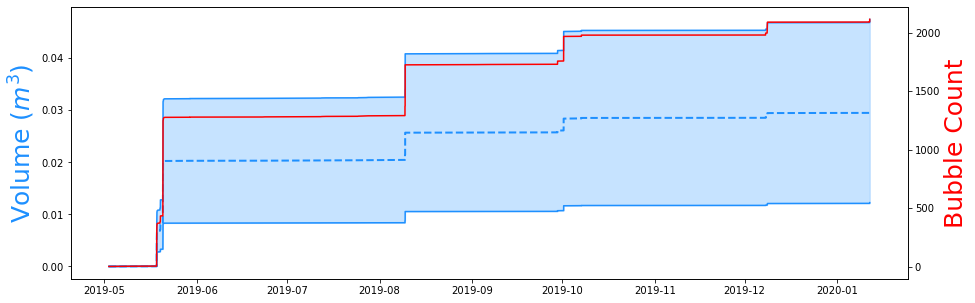

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
vols_min = bubbles.volume_min.cumsum()
vols_max = bubbles.volume_max.cumsum()
x = bubbles.index
cnt = np.ones_like(x).cumsum()

# ax.plot(x, vols, color='dodgerblue', linewidth=5)
ax.plot(x, vols_min, color='dodgerblue')
ax.plot(x, vols_max, color='dodgerblue')
ax.plot(x, (vols_min + vols_max)/2, color='dodgerblue', linestyle='--', linewidth=2)
ax.fill_between(x=x, y1=vols_min, y2=vols_max, color='dodgerblue', alpha=0.25)
ax.set_ylabel('Volume $(m^3)$', fontsize=25, color='dodgerblue')

ax2 = ax.twinx()
ax2.plot(x, cnt, color='red')
ax2.set_ylabel('Bubble Count', fontsize=25, color='red')

In [17]:
def ideal_gas_n(pressure, volume):
    P = pressure
    V = volume
    R = 8.31446261815324 # J K^−1 mol^−1
    T = 34.75 + 273.15 # K
    n = (P * V)/(R * T)
    return n

In [18]:
print('minimum H2 moles produced:', ideal_gas_n(pressure=100000, volume=vols_min.iloc[-1]))
print('maximum H2 moles produced:', ideal_gas_n(pressure=(997 * 9.8 * 15) + 100000, volume=vols_max.iloc[-1]))

minimum H2 moles produced: 0.478748217693
maximum H2 moles produced: 4.56992760347


In [19]:
Fe3plus = 55.845
O3 = 3* 15.999
((Fe3plus + O3) * 4.56992760347)

474.55042219953174